# Proyecto Final Parte I: Limpieza, análisis, visualización y kmeans

![Logo Tec](img/LogoTec2.jpg)

## Ciencia y analítica de datos (Gpo 10)
### Alumnos: 
* Armando Bringas Corpus (A01200230), 
* Walter André Hauri Rosales (A01794237)

### Profesores: 
* Dra. María de la Paz Rico Fernández
* Mtra. Victoria Guerrero Orozco

### Fecha: 16 de noviembre de 2022

In [370]:
try:
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context ='notebook', ticks =True, grid =False) 
except ImportError as error:
   print('Not running in a Jupyter Notebook')

Not running in a Jupyter Notebook


In [371]:
import geopandas as gpd
try:
    from ing_theme_matplotlib import mpl_style
except:
    pass
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
import warnings

In [372]:
try:
    mpl_style(dark=True)
    warnings.filterwarnings("ignore")
except:
    pass

## Importación de los Datos

In [373]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [374]:
data = pd.read_csv('data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
                  encoding = "ISO-8859-1")
data.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [375]:
data.tail()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
data.size

227755

In [377]:
data.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [378]:
data.columns.shape

(55,)

## Limpieza de los Datos

Analizamos la distribución de los datos nulos, es decir, cuántos atributos se tienen en nulos.

In [379]:
data.isnull().sum(axis=1).value_counts()

16    1703
55     648
25     351
17     319
23     228
12     178
13     139
21     131
24     128
14     123
15      75
22      38
18      32
20      23
27      15
19       7
26       2
29       1
dtype: int64

Encontramos que 648 registros tienen todos los valores faltantes, de manera que procedemos a eliminarlos.

In [380]:
clean_data = data.dropna(how="all")

Eliminamos todos los rergistros que no tengan un valor del semáforo válido, ya que es nuestra variable a predecir.

In [381]:
clean_data["SEMAFORO"].isna().sum() # Sin registros de semáforo faltantes
clean_data.dropna(subset=["SEMAFORO"], inplace=True) # Si llegara a haber registros, los eliminamos

/tmp/ipykernel_11000/32677346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.dropna(subset=["SEMAFORO"], inplace=True) # Si llegara a haber registros, los eliminamos


Procedemos a analizar el número de registros con datos nulos por cada atributo.

In [382]:
na_sum = clean_data.isna().sum()
na_cols = na_sum[na_sum > 0]
print(f"Número de columnas con valores NAN: {na_cols.shape[0]}")
na_cols # Identificamos las columnas con al menos un valor NAN

Número de columnas con valores NAN: 36


CUENCA                       1
CUERPO DE AGUA              14
SUBTIPO                     14
DBO_mg/L                   912
CALIDAD_DBO                912
DQO_mg/L                   912
CALIDAD_DQO                912
SST_mg/L                     4
CALIDAD_SST                  4
COLI_FEC_NMP_100mL         911
CALIDAD_COLI_FEC           911
E_COLI_NMP_100mL           911
CALIDAD_E_COLI             911
ENTEROC_NMP_100mL         2589
CALIDAD_ENTEROC           2589
OD_PORC                   1696
CALIDAD_OD_PORC           1696
OD_PORC_SUP               1874
CALIDAD_OD_PORC_SUP       1874
OD_PORC_MED               3006
CALIDAD_OD_PORC_MED       3006
OD_PORC_FON               2547
CALIDAD_OD_PORC_FON       2547
TOX_D_48_UT               1677
CALIDAD_TOX_D_48          1677
TOX_V_15_UT               1674
CALIDAD_TOX_V_15          1674
TOX_D_48_SUP_UT           2731
CALIDAD TOX_D_48_SUP      2731
TOX_D_48_FON_UT           3493
CALIDAD_TOX_D_48_FON      3493
TOX_FIS_SUP_15_UT         1819
CALIDAD_

In [383]:
with_na = clean_data[na_cols.index]
with_na # Visualizamos el conjunto de datos con valores nulos

,CUENCA,CUERPO DE AGUA,SUBTIPO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,CONTAMINANTES
0,RIO SAN PEDRO,PRESA EL SAUCILLO,PRESA,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,"DQO,CF,"
1,SAN JOSE DEL CABO,OCEANO PACIFICO,OCEANO-MAR,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,NaN
2,SAN LUCAS,OCEANO PACIFICO,OCEANO-MAR,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,NaN
3,SAN LUCAS,BAHIA SAN LUCAS,BAHIA,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,NaN
4,SAN LUCAS,BAHIA SAN LUCAS,BAHIA,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,RIO BRAVO 11,RIO SALADO,RIO,<2,Excelente,<10,Excelente,122,Aceptable,2400,Contaminada,2400,Fuertemente contaminada,NaN,NaN,69.1,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CF,E_COLI,"
3489,RIO BRAVO 11,EL LAGUITO,LAGO,39.09,Contaminada,115.88,Contaminada,54,Buena calidad,2400,Contaminada,4,Excelente,NaN,NaN,NaN,NaN,91.6,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,"DBO,DQO,CF,"
3490,RIO BRAVO 11,RIO BRAVO,RIO,4.4,Buena calidad,87.64,Contaminada,70,Buena calidad,240,Aceptable,15,Excelente,NaN,NaN,78.8,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DQO,"
3491,RIO BRAVO 10,RIO BRAVO,RIO,<2,Excelente,35.92,Aceptable,56,Buena calidad,2400,Contaminada,11,Excelente,NaN,NaN,76.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CF,"


### Cuenca

In [384]:
missing = clean_data[clean_data["CUENCA"].isna()]
missing # Visualizamos los datos con CUENCA faltante

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
820,DLMIC1546W1,DESEMBOCADURA RIO CARRIZAL DE ARTEAGA,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,NaN,TRANSICION RIO - MAR,COSTERO,ESTERO,-102.37853,17.98233,2020.0,NaN,NaN,NaN,NaN,10.8,Excelente,NaN,NaN,NaN,NaN,63,Excelente,NaN,NaN,91.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [385]:
index = missing.index[0] #Obtenemos el valor del índice del faltante
clean_data.iloc[index - 4: index + 4, :]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
816,DLAGU51M1,PRESA ABELARDO RODRIGUEZ 100M AGUAS ARRIBA DE ...,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,JESUS MARIA,PRESA EL NIAGARA,PRESA ABELARDO RODRIGUEZ,LENTICO (HUMEDAL),PRESA,-102.42860,21.91633,2020.0,<2,Excelente,28.83,Aceptable,10.5,Excelente,379,Aceptable,10,Excelente,NaN,NaN,NaN,NaN,100.7,Excelente,80.4,Excelente,50.2,Buena calidad,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
817,DLMIC1543W1,LAGUNA COSTERA EL CAIMAN 4,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,RIO ACAPILCAN,LAGUNA COSTERA EL CAIMAN,LENTICO - COSTERO (HUMEDAL),LAGUNA,-102.32441,17.97750,2020.0,NaN,NaN,NaN,NaN,19.5,Excelente,NaN,NaN,NaN,NaN,17329,Fuertemente contaminada,NaN,NaN,26.2,Contaminada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"ENT_FEC,OD%S,",ND,ND,SI,ND,ND,NO,NO,SI,COSTERO
818,DLMIC1544W1,LAGUNA COSTERA EL CAIMAN 5,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,RIO ACAPILCAN,LAGUNA COSTERA EL CAIMAN,LENTICO - COSTERO (HUMEDAL),LAGUNA,-102.32790,17.98442,2020.0,<2,Excelente,29.68,Aceptable,<10,Excelente,24196,Fuertemente contaminada,24196,Fuertemente contaminada,NaN,NaN,NaN,NaN,26,Contaminada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Amarillo,"CF,E_COLI,OD%S,",SI,SI,SI,NO,NO,ND,NO,SI,COSTERO
819,DLMIC1545,DESEMBOCADURA RIO CARRIZAL DE ARTEAGA 2,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,RIO ACAPILCAN,TRANSICION RIO - MAR,LOTICO - COSTERO,ESTERO,-102.37526,17.98857,2020.0,4.9,Buena calidad,26.88,Aceptable,<10,Excelente,6867,Contaminada,384,Buena calidad,NaN,NaN,76.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,COSTERO
820,DLMIC1546W1,DESEMBOCADURA RIO CARRIZAL DE ARTEAGA,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,NaN,TRANSICION RIO - MAR,COSTERO,ESTERO,-102.37853,17.98233,2020.0,NaN,NaN,NaN,NaN,10.8,Excelente,NaN,NaN,NaN,NaN,63,Excelente,NaN,NaN,91.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
821,DLMIC1548,RIO BALSAS CORRIENTE IZQ PUENTE,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,RIO BAJO BALSAS,RIO BALSAS CORRIENTE IZQ PUENTE,LOTICO - COSTERO (HUMEDAL),RIO,-102.19769,17.97331,2020.0,<2,Excelente,11.592,Buena calidad,<10,Excelente,24196,Fuertemente contaminada,17329,Fuertemente contaminada,NaN,NaN,98.1,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,COSTERO
822,DLMIC1549,RIO BALSAS 5,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,RIO BAJO BALSAS,RIO BALSAS,LOTICO,RIO,-102.20828,18.00848,2020.0,<2,Excelente,18.22,Buena calidad,<10,Excelente,6867,Contaminada,4611,Fuertemente contaminada,NaN,NaN,63.5,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
823,DLMIC1553,RIO BALSAS PUENTE VIEJO,BALSAS,MICHOACAN DE OCAMPO,LAZARO CARDENAS,RIO BAJO BALSAS,RIO BALSAS PUENTE VIEJO,LENTICO (HUMEDAL),LAGO,-102.19073,18.02432,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,24196,Fuertemente contaminada,75,Excelente,NaN,NaN,NaN,NaN,52,Buena calidad,NaN,NaN,NaN

Podemos observar que los registros eestán acomodados de forma que las cuencas, municipios y estados aparezcan seriados. Partiendo de esta premisa, el valor faltante se encuentra en Michoacán, en el municipio de Lázaro Cárdenas y tiene una mayor similitud con el registro superior a él. De forma que se colocará la misma cuenca (_RIO ACAPILCAN_).

In [386]:
clean_data.loc[index, "CUENCA"] = "RIO ACAPILCAN"
data_types = {"CUENCA": "object"} # Data types to be converted when cleaned

### Cuerpo de agua

In [387]:
cuerpo_agua = clean_data["CUERPO DE AGUA"]
missing = clean_data[cuerpo_agua.isna()]
missing # Visualizamos los datos con CUENCA faltante

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1573,DLTAB5552,MANATI 1,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.33349,18.06207,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,332,Aceptable,20,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,ND,SI,LOTICO
1574,DLTAB5553,MANATI 2,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.33424,18.07569,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,241,Aceptable,52,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,ND,SI,LOTICO
1575,DLTAB5554,MANATI 3,FRONTERA SUR,TABASCO,JONUTA,Chilapa,NaN,LOTICO,NaN,-92.30066,18.09384,2020.0,<2,Excelente,12.54,Buena calidad,<10,Excelente,432,Aceptable,86,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,ND,SI,LOTICO
1576,DLTAB5555,MANATI 4,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.30488,18.09933,2020.0,<2,Excelente,28.42,Aceptable,<10,Excelente,1086,Contaminada,203,Buena calidad,NaN,NaN,<10,Fuertemente contaminada,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
1577,DLTAB5556,MANATI 5,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.35835,18.02775,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,216,Aceptable,85,Excelente,NaN,NaN,48.7,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO
1578,DLTAB5557,MANATI 6,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.35786,18.03186,2020.0,<2,Excelente,13.38,Buena calidad,44.4,Buena calidad,359,Aceptable,145,Buena calidad,NaN,NaN,53.1,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO
1579,DLTAB5558,MANATI 7,FRONTERA SUR,TABASCO,JONUTA,Chilapa,NaN,LOTICO,NaN,-92.31493,17.95932,2020.0,<2,Excelente,21.74,Aceptable,<10,Excelente,1872,Contaminada,833,Aceptable,NaN,NaN,<10,Fuertemente contaminada,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
1580,DLTAB5559,MANATI 8,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.32552,17.80520,2020.0,<2,Excelente,<10,Excelente,33.13,Buena calidad,1198,Contaminada,728,Aceptable,NaN,NaN,67,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
1581,DLTAB5560,MANATI 9,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.31082,18.00212,2020.0,<2,Excelente,20.06,Aceptable,<10,Excelente,1274,Contaminada,161,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,",SI,SI,SI,NO,SI,ND,ND,SI,LOTICO
1582,DLTAB5561,MANATI 10,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.30760,17.92084,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,1872,Contaminada,457,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"

In [388]:
cuerpo_agua.unique()

array(['PRESA EL SAUCILLO', 'OCEANO PACIFICO', 'BAHIA SAN LUCAS', ...,
       'PRESA MARTE R. GOMEZ', 'PRESA INTERNACIONAL FALCON', 'EL LAGUITO'],
      dtype=object)

Podemos observar que la columna _CUERPO DE AGUA_ hace referencia al nombre de pila,  y que los valores faltantes corresponden a un único cuerpo que no tiene el nombre definido. Por tanto, colocaremos en todos ellos un nombre genérico _Desconocido_, para evitar la presencia de valores nulos.

In [389]:
to_fill = {"CUERPO DE AGUA": "Desconocido"} # Dict with values to be placed in dataframe to fill na
data_types["CUERPO DE AGUA"] = "object" # Data types to be converted when cleaned

### Subtipo

In [390]:
subtipo = clean_data["SUBTIPO"]
missing = clean_data[subtipo.isna()]
missing # Visualizamos los datos con CUENCA faltante

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1573,DLTAB5552,MANATI 1,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.33349,18.06207,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,332,Aceptable,20,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,ND,SI,LOTICO
1574,DLTAB5553,MANATI 2,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.33424,18.07569,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,241,Aceptable,52,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,ND,SI,LOTICO
1575,DLTAB5554,MANATI 3,FRONTERA SUR,TABASCO,JONUTA,Chilapa,NaN,LOTICO,NaN,-92.30066,18.09384,2020.0,<2,Excelente,12.54,Buena calidad,<10,Excelente,432,Aceptable,86,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,ND,SI,LOTICO
1576,DLTAB5555,MANATI 4,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.30488,18.09933,2020.0,<2,Excelente,28.42,Aceptable,<10,Excelente,1086,Contaminada,203,Buena calidad,NaN,NaN,<10,Fuertemente contaminada,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
1577,DLTAB5556,MANATI 5,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.35835,18.02775,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,216,Aceptable,85,Excelente,NaN,NaN,48.7,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO
1578,DLTAB5557,MANATI 6,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.35786,18.03186,2020.0,<2,Excelente,13.38,Buena calidad,44.4,Buena calidad,359,Aceptable,145,Buena calidad,NaN,NaN,53.1,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LOTICO
1579,DLTAB5558,MANATI 7,FRONTERA SUR,TABASCO,JONUTA,Chilapa,NaN,LOTICO,NaN,-92.31493,17.95932,2020.0,<2,Excelente,21.74,Aceptable,<10,Excelente,1872,Contaminada,833,Aceptable,NaN,NaN,<10,Fuertemente contaminada,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
1580,DLTAB5559,MANATI 8,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.32552,17.80520,2020.0,<2,Excelente,<10,Excelente,33.13,Buena calidad,1198,Contaminada,728,Aceptable,NaN,NaN,67,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
1581,DLTAB5560,MANATI 9,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.31082,18.00212,2020.0,<2,Excelente,20.06,Aceptable,<10,Excelente,1274,Contaminada,161,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"CF,",SI,SI,SI,NO,SI,ND,ND,SI,LOTICO
1582,DLTAB5561,MANATI 10,FRONTERA SUR,TABASCO,MACUSPANA,Chilapa,NaN,LOTICO,NaN,-92.30760,17.92084,2020.0,<2,Excelente,<10,Excelente,<10,Excelente,1872,Contaminada,457,Buena calidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,<1,No Toxico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amarillo,"

Observamos que son los mismos registros que tienen el _CUERPO DE AGUA_ faltante, de forma que procedemos a agregar también un _Desconocido_.

In [391]:
to_fill["SUBTIPO"] = "Desconocido" # Agregamos la opción al diccionario para llenar valores faltantes por columna
clean_data = clean_data.fillna(value=to_fill) # Llenamos los datos con el diccionario
data_types["CUERPO DE AGUA"] = "object" # Data types to be converted when cleaned

### DBO_mg/L

In [392]:
dbo = clean_data["DBO_mg/L"]
dbo.unique()

array(['6', nan, '<2', '4.26', '6.4', '4.98', '5.46', '7.1', '4.66',
       '5.3', '5.73', '7.68', '8.06', '11.06', '18.86', '33.42', '27.42',
       '30.66', '9.66', '4.74', '4.77', '3.63', '5.1', '8.49', '4.32',
       '10.14', '12.21', '4.14', '5.52', '3.27', '11.85', '49.6', '6.42',
       '42.9', '127.75', '9.2', '35.5', '4.44', '20.9', '5.04', '5.56',
       '10.7', '5.14', '20.5', '8', '7.94', '45.1', '34.95', '7.58',
       '7.92', '8.9', '5.84', '7.08', '10.1', '5.9', '12.8', '13.2',
       '9.8', '6.14', '9.86', '8.2', '19.5', '6.48', '8.76', '22.2',
       '4.28', '2.34', '4.38', '10.3', '7.82', '4.3', '4.54', '10.2',
       '6.76', '37.2', '4.02', '4.06', '4.52', '5.44', '7.7', '5.02',
       '24.61', '45.3', '42.3', '27.9', '54.02', '42.01', '59.27',
       '75.31', '45.6', '23.1', '56.12', '63.47', '7.5', '31.5', '25.36',
       '26.11', '23.4', '12', '57.47', '7.2', '22.6', '32.7', '11.1',
       '10.6', '3.18', '7.66', '4.48', '6.96', '2.6', '11.63', '89.71',
       '58

Podemos observar que son valores numéricos, excepto por los faltantes y una categoría denominada _<2_. Veamos qué tantos valores entran en esa categoría.

In [393]:
dbo[dbo == "<2"].count() / dbo.count()

0.47423479271600155

Casi la mitad de los datos entran en esa categoría, de forma que imputar un valor tomaría la máxima relevancia en la distribución de los datos. Podemos analizar cómo se distribuyen el resto de los datos.

<AxesSubplot: >

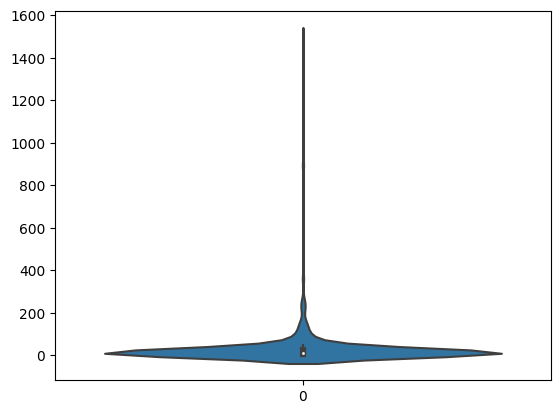

In [394]:
sns.violinplot(dbo[dbo != "<2"].astype("float"))

En este caso se puede observar que los valores tienen una distribución centrada en valores chicos (menores a 100), con algunos outliers que superan esos valores. Con eesto en mente, podemos imputar la categoría de _<2_ a un único valor 0.

In [395]:
clean_data.loc[dbo == "<2", "DBO_mg/L"] = 0

In [396]:
clean_dbo = clean_data["DBO_mg/L"].dropna()
clean_dbo = clean_dbo.astype("float")
clean_dbo.describe()

count    2581.000000
mean       15.938011
std        65.364379
min         0.000000
25%         0.000000
50%         2.630000
75%        10.000000
max      1500.000000
Name: DBO_mg/L, dtype: float64

In [397]:
clean_data = clean_data.fillna(value={"DBO_mg/L": clean_dbo.median()}) # Fill with the median value (mean will be affected by outliers)
data_types["DBO_mg/L"] = "float64" # Data types to be converted when cleaned

### CALIDAD_DBO

In [398]:
quality_dbo = clean_data["CALIDAD_DBO"]
quality_dbo.unique()

array(['Buena calidad', nan, 'Excelente', 'Aceptable', 'Contaminada',
       'Fuertemente contaminada'], dtype=object)

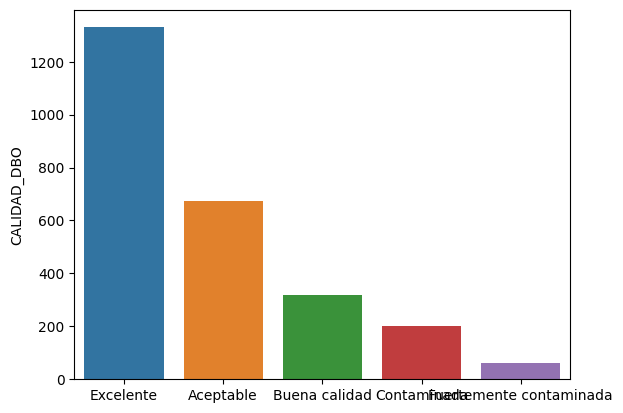

In [399]:
sns.barplot(x=quality_dbo.value_counts().index, y=quality_dbo.value_counts());

In [400]:
quality_dbo.describe()

count          2581
unique            5
top       Excelente
freq           1330
Name: CALIDAD_DBO, dtype: object

Se observa que la categoría predominante es _Excelente_, por lo que se puede hacer una imputación por moda.

In [401]:
clean_data = clean_data.fillna(value={"CALIDAD_DBO": quality_dbo.mode()[0]}) # Fill with the mode
data_types["CALIDAD_DBO"] = "object" # Data types to be converted when cleaned

### DQO_mg/L

In [402]:
dqo = clean_data["DQO_mg/L"]
dqo.unique()

array(['54.08', nan, '<10', ..., '115.88', '35.92', '34.6'], dtype=object)

Se observa un comportamiento similar al de DBO, donde hay una categoría marcada como "<10" y el resto tienen valores numéricos. Analizamos esos valores numéricos.

In [403]:
dqo[dqo == "<10"].count() / dqo.count() # Porcentaje de valores en la categoría no numperica

0.21658271987601704

<AxesSubplot: >

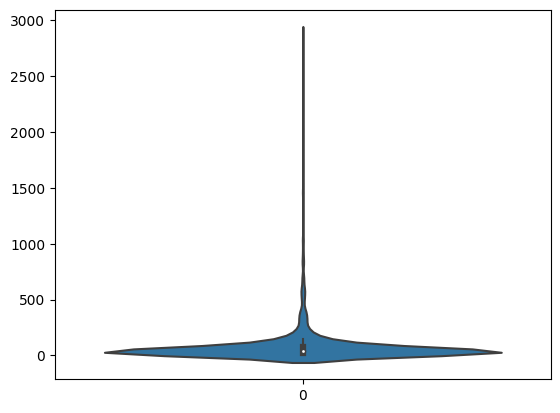

In [404]:
sns.violinplot(dqo[dqo != "<10"].astype("float"))

De manera simila, podemos seguir el mismo procedimiento que anteriormente con la variable DBO, usando la mediana para imputar los nulos, y colocar en 0 los de la categoría _<10_.

In [405]:
clean_data.loc[dqo == "<10", "DQO_mg/L"] = 0
clean_dqo = clean_data["DQO_mg/L"].dropna()
clean_dqo = clean_dqo.astype("float")
clean_dqo.describe()

count    2581.000000
mean       62.167157
std       150.668059
min         0.000000
25%        11.870000
50%        27.010000
75%        57.000000
max      2871.250000
Name: DQO_mg/L, dtype: float64

In [406]:
clean_data = clean_data.fillna(value={"DQO_mg/L": clean_dqo.median()}) # Fill with the median value (mean will be affected by outliers)
data_types["DQO_mg/L"] = "float64" # Data types to be converted when cleaned

### CALIDAD_DQO

In [407]:
quality_dqo = clean_data["CALIDAD_DQO"]
quality_dqo.unique()

array(['Contaminada', nan, 'Excelente', 'Aceptable', 'Buena calidad',
       'Fuertemente contaminada'], dtype=object)

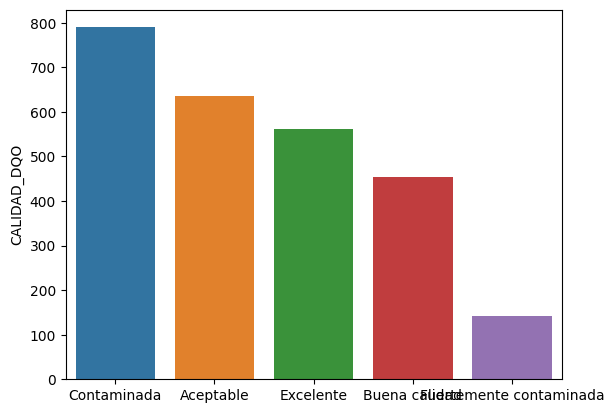

In [408]:
sns.barplot(x=quality_dqo.value_counts().index, y=quality_dqo.value_counts());

In [409]:
clean_data = clean_data.fillna(value={"CALIDAD_DQO": quality_dqo.mode()[0]}) # Fill with the mode
data_types["CALIDAD_DQO"] = "object" # Data types to be converted when cleaned

Hagamos una función que nos permita reproducir los métodos anteriormente realizados para las subsecuentes columnas, las cuales o serán numéricas o categóricas.

In [410]:
# Treat all numerical
def numeric_treatment(df, column, unique_category=None, unique_value_imputation=None):
    numeric = df[column] # Get this column
    if unique_category:
        # Get the percentage it represents
        print(f"Percentage of unique value to total: {numeric[numeric == unique_category].count() / numeric.count()}")
        # Get all rows with the unique value
        df.loc[numeric == unique_category, column] = 0
        # Cmpute the median of the numericla values
        clean_numeric = numeric.dropna()
        clean_numeric = clean_numeric.astype("float")
        # Display statistics
        print(f"Values distribution: {clean_numeric.describe()}")
    else:
        clean_numeric = numeric.dropna()
    # Make a little plot
    sns.violinplot(numeric[numeric != unique_category].astype("float"))
    plt.show()
    # Impute new vaue
    return df.fillna(value={column: clean_numeric.median()}) # Fill with the median value (mean will be affected by outliers)

# Treat all categorical
def categorical_treatment(df, column):
    quality = df[column]
    sns.barplot(x=quality.value_counts().index, y=quality.value_counts());
    return df.fillna(value={column: quality.mode()[0]}) # Fill with the mode

### SST_mg/L

In [411]:
clean_data["SST_mg/L"].unique()

array(['13.75', '<10', '13.9667', ..., '137', '22.09', '119'],
      dtype=object)

Percentage of unique value to total: 0.2522212668386357
Values distribution: count    3489.000000
mean       99.625931
std       442.407559
min         0.000000
25%         0.000000
50%        24.300000
75%        57.000000
max      9430.000000
Name: SST_mg/L, dtype: float64


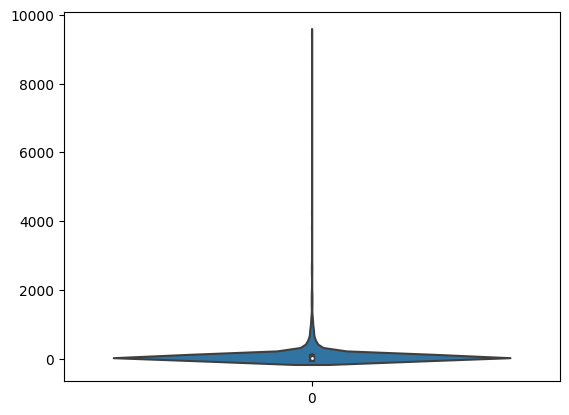

In [412]:
clean_data = numeric_treatment(clean_data, "SST_mg/L", "<10", 0)
data_types["SST_mg/L"] = "float64" # Data types to be converted when cleaned

### CALIDAD_SST

In [413]:
column = "CALIDAD_SST"
clean_data[column].unique()

array(['Excelente', 'Buena calidad', 'Contaminada', 'Aceptable', nan,
       'Fuertemente contaminada'], dtype=object)

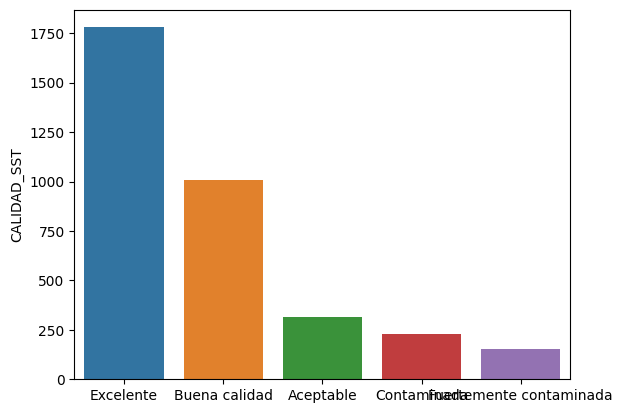

In [414]:
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### COLI_FEC_NMP_100mL

In [415]:
column = "COLI_FEC_NMP_100mL"
clean_data[column].unique()

array(['1162', nan, '3873', '189', '1408', '15531', '10', '24196', '218',
       '663', '14136', '1720', '2613', '495', '1650', '3255', '2481',
       '2046', '17329', '17863', '230', '430', '90', '2400', '70', '40',
       '210', '<3', '175', '241960', '15531000', '148', '52', '4611',
       '31', '364', '1523', '2755', '3448', '4884', '1439', '1450',
       '120330', '480', '3654', '9804', '109', '7270', '1421', '1553',
       '1872', '11199', '4280', '1793', '805', '1266', '1585', '1483',
       '2909', '749', '1430', '187', '41', '98', '183', '1172', '767',
       '216', '504', '20', '141360', '19863', '17230', '19560', '46110',
       '3180', '4950', '2247', '12100', '1220', '12033', '5475', '3076',
       '135', '722', '1229', '1860', '97', '512', '4352', '8164', '8664',
       '63', '448', '1090', '1198', '2014', '331', '1723', '1119900',
       '1725', '110', '132', '833', '75', '417', '785', '299', '471',
       '104', '5748', '122', '1918', '464', '1500', '280', '930', '11000

Percentage of unique value to total: 0.04221533694810225
Values distribution: count    2.582000e+03
mean     9.568868e+04
std      1.168887e+06
min      0.000000e+00
25%      3.420000e+02
50%      2.400000e+03
75%      2.400000e+04
max      2.419600e+07
Name: COLI_FEC_NMP_100mL, dtype: float64


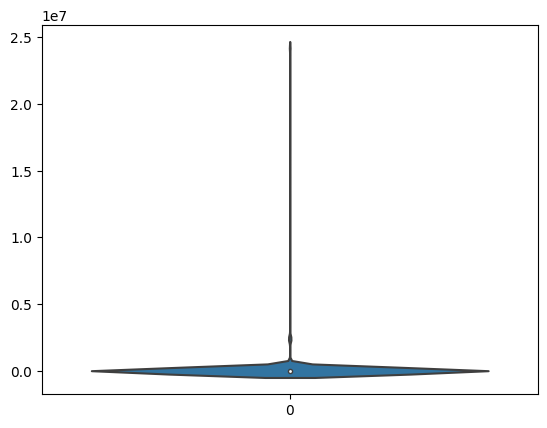

In [416]:
clean_data = numeric_treatment(clean_data, column, "<3", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### CALIDAD_COLI_FEC

['Contaminada' nan 'Buena calidad' 'Fuertemente contaminada' 'Excelente'
 'Aceptable']


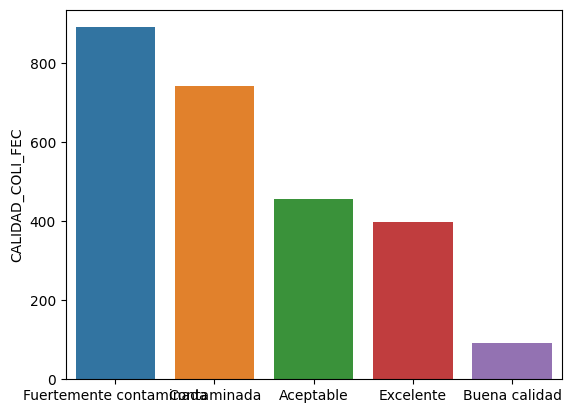

In [417]:
column = "CALIDAD_COLI_FEC"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### E_COLI_NMP_100mL

In [418]:
column = "E_COLI_NMP_100mL"
clean_data[column].unique()

array(['98', nan, '512', '<3', '84', '538', '14136', '74', '368', '20',
       '10', '384', '131', '3076', '97', '171', '489', '210', '40', '90',
       '230', '2400', '70', '60', '241960', '24196', '12997000', '1789',
       '52', '63', '187', '85', '201', '144', '32550', '8664', '459',
       '256', '142', '100', '121', '120', '86', '73', '249', '933',
       '26130', '1956', '3640', '1560', '19863', '7701', '11199', '15531',
       '1291', '3255', '34480', '108', '959', '3880', '158', '410',
       '5172', '285', '3448', '146', '31', '48040', '9208', '670', '4884',
       '563', '3654', '17329', '1935', '300', '605', '173', '61', '96',
       '110', '341', '9804', '41', '226', '243', '269', '866400', '650',
       '30', '189', '464', '1500', '930', '430', '11000', '200', '24000',
       '280', '2100', '4600', '150', '576', '4611', '4106', '1000',
       '104620', '2419600', '6131', '5794', '43', '460', '135400',
       '14800', '663000', '31000', '24196000', '14136000', '241',
     

Percentage of unique value to total: 0.14136328427575523
Values distribution: count    2.582000e+03
mean     7.933726e+04
std      1.051334e+06
min      0.000000e+00
25%      4.000000e+01
50%      4.240000e+02
75%      6.488000e+03
max      2.419600e+07
Name: E_COLI_NMP_100mL, dtype: float64


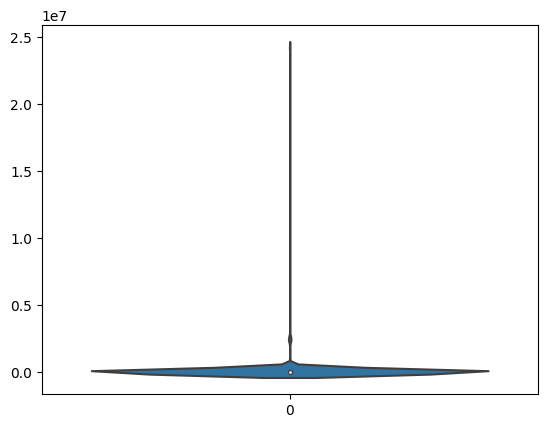

In [419]:
clean_data = numeric_treatment(clean_data, column, "<3", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### CALIDAD_E_COLI

['Excelente' nan 'Buena calidad' 'Fuertemente contaminada' 'Contaminada'
 'Aceptable']


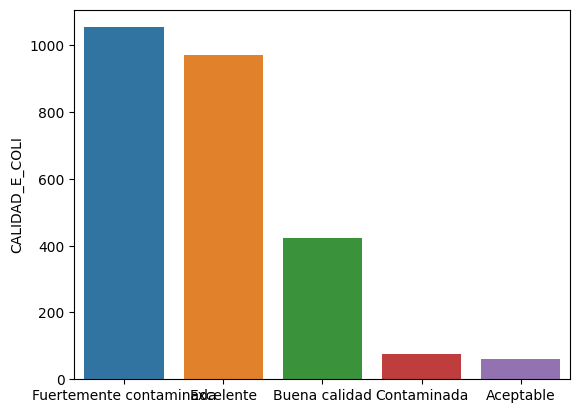

In [420]:
column = "CALIDAD_E_COLI"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### ENTEROC_NMP_100mL

In [421]:
column = "ENTEROC_NMP_100mL"
clean_data[column].unique()

array([nan, '20', '<3', '30', '90', '402', '24196', '350', '355', '17329',
       '108', '118', '75', '4', '9', '7', '1722', '250', '556', '62',
       '41', '203', '10', '504', '148', '256', '173', '121', '187',
       '2778', '31', '2603', '5298', '246', '259', '11199', '14136',
       '3255', '5172', '52', '8664', '63', '5748', '109', '457', '1780',
       '73', '437', '865', '2114', '581', '84', '51', '320', '74', '98',
       '122', '4520', '1935', '19863', '422', '763', '608', '9208', '862',
       '114', '3724', '364', '959', '283', '1309', '131', '130', '359',
       '8704', '8164', '1169', '161', '345', '1050', '1211', '5794',
       '6488', '1259', '119', '97', '160', '43', '166', '512', '23', '93',
       '240', '21', '1376', '465', '275', '83', '669', '1723', '412',
       '382', '146', '1947', '5335', '4106', '776', '505', '1014',
       '10462', '3257', '435', '243', '10112', '82', '3873', '325', '155',
       '629', '2723', '3076', '408', '145', '573', '1100', '529', '10

Percentage of unique value to total: 0.5132743362831859
Values distribution: count      904.000000
mean      1085.170022
std       4306.301542
min          0.000000
25%          0.000000
50%          0.000000
75%         63.000000
max      24196.000000
Name: ENTEROC_NMP_100mL, dtype: float64


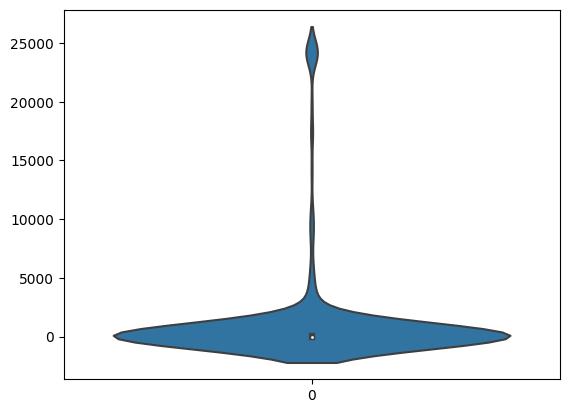

In [422]:
clean_data = numeric_treatment(clean_data, column, "<3", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### Calidades

### CALIDAD_ENTEROC

[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Buena calidad']


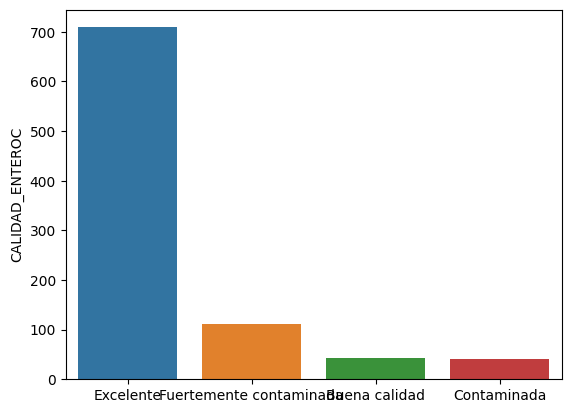

In [423]:
column = "CALIDAD_ENTEROC"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_OD_PORC

[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Aceptable'
 'Buena calidad']


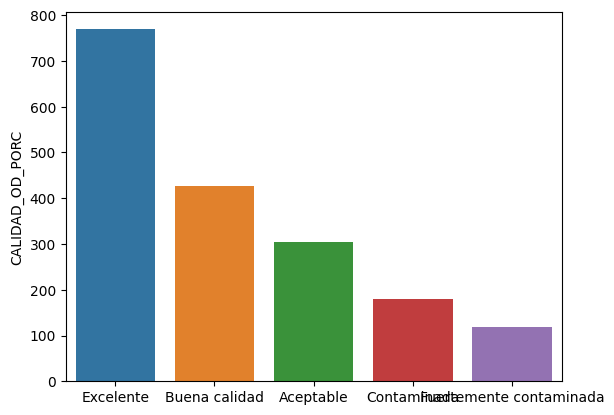

In [424]:
column = "CALIDAD_OD_PORC"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_OD_PORC_SUP

['Aceptable' 'Excelente' nan 'Buena calidad' 'Contaminada'
 'Fuertemente contaminada']


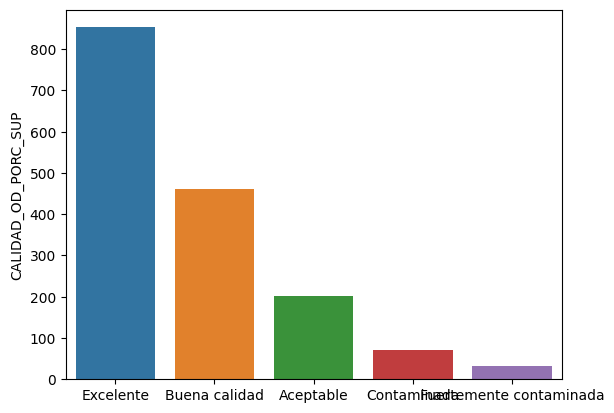

In [425]:
column = "CALIDAD_OD_PORC_SUP"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_OD_PORC_MED

[nan 'Excelente' 'Buena calidad' 'Contaminada' 'Aceptable'
 'Fuertemente contaminada']


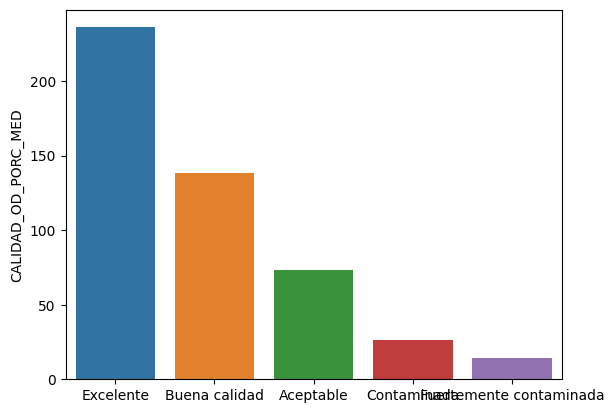

In [426]:
column = "CALIDAD_OD_PORC_MED"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_OD_PORC_FON

[nan 'Excelente' 'Contaminada' 'Buena calidad' 'Aceptable'
 'Fuertemente contaminada']


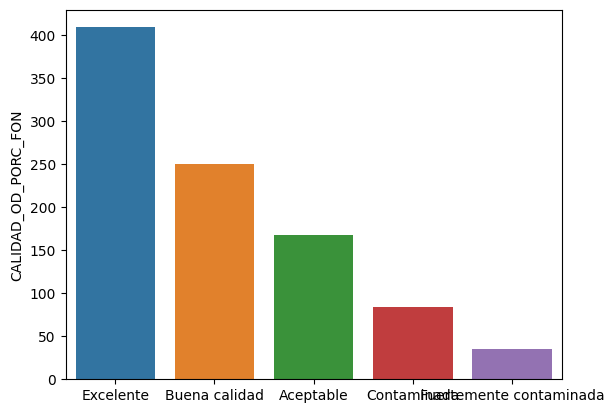

In [427]:
column = "CALIDAD_OD_PORC_FON"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_TOX_D_48

[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad baja' 'Toxicidad alta']


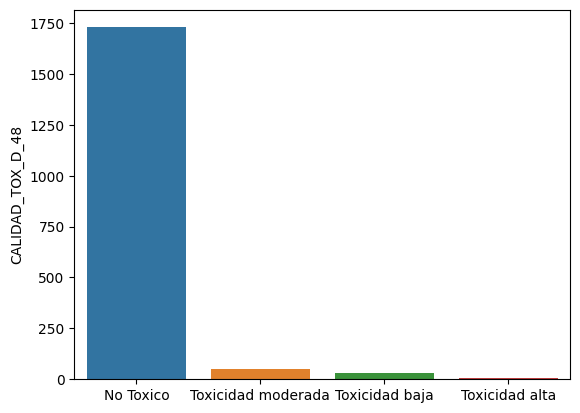

In [428]:
column = "CALIDAD_TOX_D_48"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_TOX_V_15

[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad alta' 'Toxicidad baja']


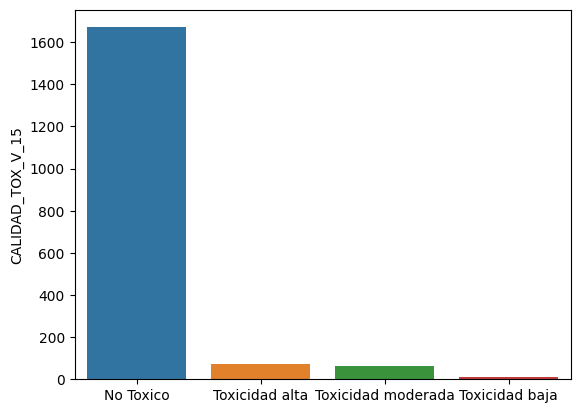

In [429]:
column = "CALIDAD_TOX_V_15"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_TOX_D_48_FON

In [430]:
column = "CALIDAD_TOX_D_48_FON"
print(clean_data[column].unique())

[nan]


Esta columna está vacía, por tanto no contiene ningún registro y se puede eliminar del conjunto de datos completo.

In [431]:
clean_data = clean_data.drop(columns=[column])

### CALIDAD_TOX_FIS_SUP_15

['No Toxico' nan 'Toxicidad moderada' 'Toxicidad baja' 'Toxicidad alta']


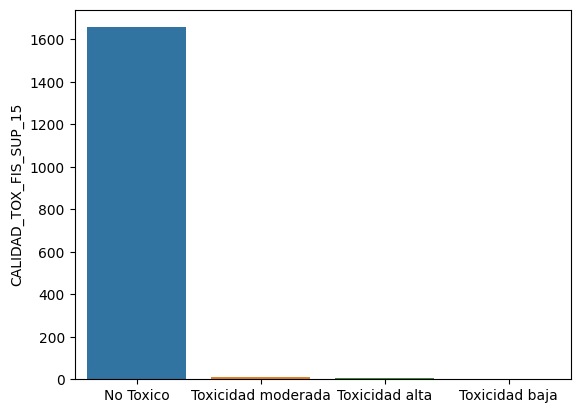

In [432]:
column = "CALIDAD_TOX_FIS_SUP_15"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### CALIDAD_TOX_FIS_FON_15

In [433]:
column = "CALIDAD_TOX_FIS_FON_15"
print(clean_data[column].unique())

[nan]


Columna vacía, por tanto se elimina del conjunto de datos.

In [434]:
clean_data = clean_data.drop(columns=[column])

### CALIDAD TOX_D_48_SUP

['No Toxico' nan 'Toxicidad moderada' 'Toxicidad baja' 'Toxicidad alta']


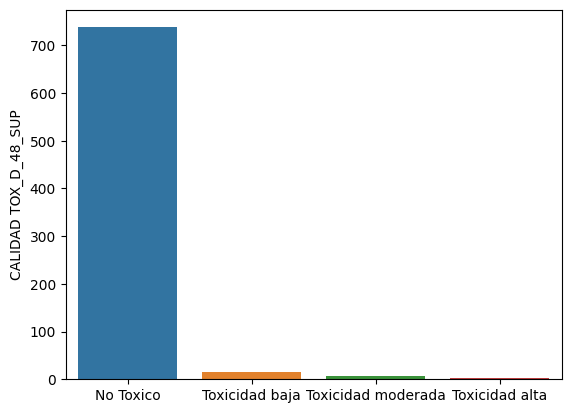

In [435]:
column = "CALIDAD TOX_D_48_SUP"
print(clean_data[column].unique())
clean_data = categorical_treatment(clean_data, column)
data_types[column] = "object" # Data types to be converted when cleaned

### Contaminantes

In [436]:
column = "CONTAMINANTES"
print(clean_data[column].unique())

['DQO,CF,' nan 'ENT_FEC,OD%F,' 'CF,' 'OD%L,' 'CF,OD%L,' 'CF,E_COLI,'
 'ENT_FEC,' 'OD%S,OD%M,OD%F,' 'OD%S,' 'DQO,' 'DBO,DQO,' 'SST,'
 'SST,CF,E_COLI,' 'DBO,DQO,CF,E_COLI,TOX_L,' 'DQO,CF,E_COLI,'
 'DBO,DQO,CF,E_COLI,OD%L,' 'DBO,DQO,CF,E_COLI,OD%L,TOX_L,'
 'DQO,CF,E_COLI,OD%L,' 'DBO,DQO,CF,E_COLI,' 'DQO,CF,OD%L,'
 'DQO,SST,CF,E_COLI,' 'SST,CF,' 'CF,OD%S,' 'DQO,CF,OD%S,' 'SST,ENT_FEC,'
 'ENT_FEC,OD%S,' 'DQO,OD%S,' 'CF,E_COLI,OD%L,' 'OD%F,' 'DQO,SST,CF,'
 'DQO,OD%L,' 'DBO,DQO,OD%L,' 'DBO,DQO,E_COLI,OD%L,' 'DBO,DQO,OD%L,TOX_L,'
 'DBO,DQO,SST,' 'DBO,DQO,SST,CF,E_COLI,TOX_L,' 'DQO,SST,' 'DQO,OD%M,OD%F,'
 'DQO,OD%F,' 'DBO,DQO,SST,CF,E_COLI,' 'DBO,DQO,OD%M,OD%F,'
 'CF,E_COLI,OD%S,OD%M,OD%F,' 'CF,E_COLI,OD%M,OD%F,' 'E_COLI,OD%M,OD%F,'
 'DQO,CF,E_COLI,OD%M,OD%F,' 'DBO,DQO,SST,E_COLI,OD%L,TOX_L,'
 'DBO,DQO,SST,CF,E_COLI,OD%L,TOX_L,' 'DBO,DQO,CF,'
 'DQO,SST,CF,E_COLI,OD%L,' 'DBO,DQO,CF,E_COLI,OD%S,OD%F,'
 'DBO,DQO,SST,CF,E_COLI,OD%L,' 'DBO,DQO,SST,E_COLI,' 'DQO,SST,OD%L,'
 'SST,CF,E_COLI,OD%L,' 'DQO

In [437]:
clean_data[column].isna().sum()

1267

Imputamos un valor desconocido, ya que las categorías y los tipos de contaminación son muy variados.

In [438]:
to_fill = {"CONTAMINANTES": "Desconocido"} # Agregamos la opción al diccionario para llenar valores faltantes por columna
clean_data = clean_data.fillna(value=to_fill) # Llenamos los datos con el diccionario
data_types[column] = "object" # Data types to be converted when cleaned

### Numéricas

### OD_PORC

In [439]:
column = "OD_PORC"
clean_data[column].unique()

array([nan, '83.6', '137', '90', '25', '104.8', '95.1', '93.4', '85.4',
       '98.2', '86.2', '200', '143.07', '122.6', '111.8', '22.4', '69.1',
       '50.8', '84.1', '22', '58.2', '50.2', '45.3', '43.6', '49.2',
       '51.7', '60.2', '61.7', '57.1', '50.1', '49.7', '51', '54.7',
       '56.8', '55.6', '94.4', '33', '27', '<10', '120.2', '20.1', '53.9',
       '98', '97.1', '97.2', '96.4', '93.5', '101', '88.1', '102.7',
       '69.7', '94.1', '114.8', '128.4', '120.8', '145.4', '125.8', '86',
       '114.4', '60.3', '40.8', '64.6', '39.7', '54.6', '32.6', '96.3',
       '97.3', '92.5', '83.4', '96.1', '100.9', '82', '99', '100.2', '74',
       '94.6', '99.9', '96.9', '97.9', '102.3', '102', '103.8', '55.7',
       '92', '94', '100.5', '87.7', '70.7', '101.7', '119.8', '107',
       '100.8', '107.8', '104.6', '107.4', '101.8', '57.8', '106.9',
       '102.4', '101.4', '127.2', '109.9', '106.8', '97.6', '114',
       '158.8', '118.3', '100.6', '127.9', '98.6', '78.4', '40', '124.4',


Percentage of unique value to total: 0.06121313299944352
Values distribution: count    1797.000000
mean       66.228158
std        32.594686
min         0.000000
25%        44.300000
50%        68.300000
75%        91.600000
max       226.100000
Name: OD_PORC, dtype: float64


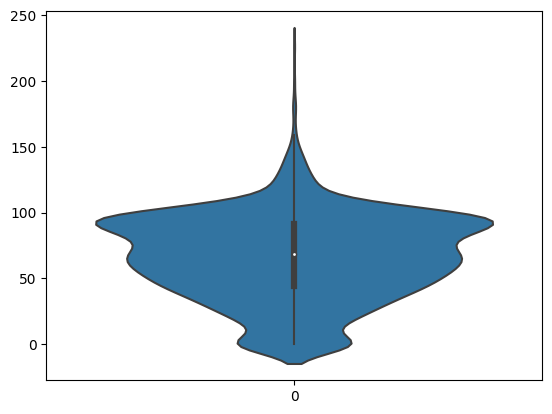

In [440]:
clean_data = numeric_treatment(clean_data, column, "<10", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### OD_PORC_SUP

In [441]:
column = "OD_PORC_SUP"
clean_data[column].unique()

array(['46.8', '92', nan, '96.2', '90.1', '81.9', '89.2', '110.7',
       '106.3', '101.4', '102.4', '99.3', '118.4', '86.1', '87.2', '96.9',
       '86.7', '85.7', '76.4', '107.7', '86.5', '85.9', '90.4', '83.6',
       '93.6', '98.6', '114.9', '117.8', '130.6', '108.7', '71.3',
       '106.5', '111.3', '107.6', '108.9', '106', '101.7', '117.6',
       '93.5', '69.8', '101.9', '107.9', '107.4', '111.2', '114.2',
       '110.9', '115.2', '88.4', '90.9', '84.5', '88.5', '83.3', '82.3',
       '87.1', '96.5', '84', '80.4', '22.7', '63.1', '60.4', '56.3',
       '118.6', '70.5', '31.1', '61.2', '82.4', '83.7', '69.4', '61.3',
       '57.2', '59.3', '66.1', '63.2', '54.6', '52.5', '71.6', '47.9',
       '53.2', '58.3', '70.6', '120.1', '111.1', '73.3', '50.4', '83',
       '114', '108.8', '129.1', '119', '50.1', '99.1', '109.7', '105.8',
       '98.4', '103.9', '92.3', '92.1', '88.6', '93.1', '94.8', '105.9',
       '103.1', '68.7', '85', '100.9', '71.8', '38.5', '90.8', '142',
       '136

Percentage of unique value to total: 0.00926497838171711
Values distribution: count    1619.000000
mean       81.367326
std        28.809245
min         0.000000
25%        61.200000
50%        84.100000
75%        99.950000
max       289.000000
Name: OD_PORC_SUP, dtype: float64


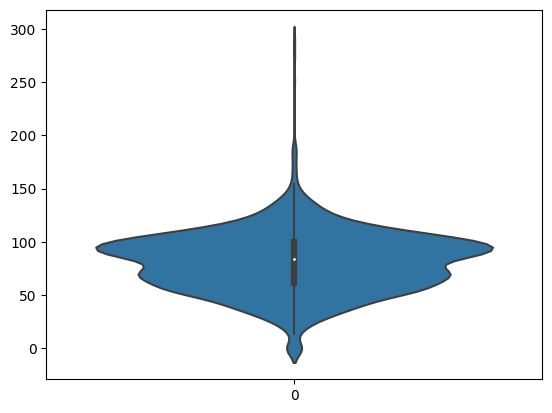

In [442]:
clean_data = numeric_treatment(clean_data, column, "<10", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### OD_PORC_MED

In [443]:
column = "OD_PORC_MED"
clean_data[column].unique()

array([nan, '95.4', '95.9', '95.2', '82.4', '108.6', '106.7', '99.7',
       '102.4', '99.6', '114.5', '116.2', '105.5', '83.1', '93.2', '89.8',
       '95.5', '100.8', '133', '106', '109.7', '101.2', '101.1', '108',
       '103.2', '98.9', '108.9', '103', '107.8', '107.5', '111.3',
       '113.9', '116.4', '68.9', '40.3', '86.1', '89.1', '89.2', '92.4',
       '96.6', '94.8', '112.3', '111.6', '97.3', '77.4', '76', '46',
       '35.5', '39.3', '47.7', '40.7', '88.4', '98.4', '94.2', '47.8',
       '27.4', '22.7', '21.7', '19.1', '19.3', '19.7', '54.1', '90.9',
       '102.8', '55.6', '<10', '69.6', '49.1', '69.4', '87.4', '89.5',
       '42.8', '83.7', '33.8', '103.8', '69.3', '68.4', '69.7', '69.1',
       '68.6', '67.8', '68.2', '51', '56.4', '79.3', '71.8', '70.2',
       '59.6', '66', '77.1', '59.8', '60.2', '63', '64.9', '69.8', '68.1',
       '69.9', '36.4', '65.5', '65.4', '66.8', '61.3', '64.8', '67.3',
       '59.1', '64.2', '66.4', '29.9', '25', '31.7', '79.5', '74.2',
     

Percentage of unique value to total: 0.028747433264887063
Values distribution: count    487.000000
mean      71.303491
std       27.086245
min        0.000000
25%       52.400000
50%       72.400000
75%       91.500000
max      133.000000
Name: OD_PORC_MED, dtype: float64


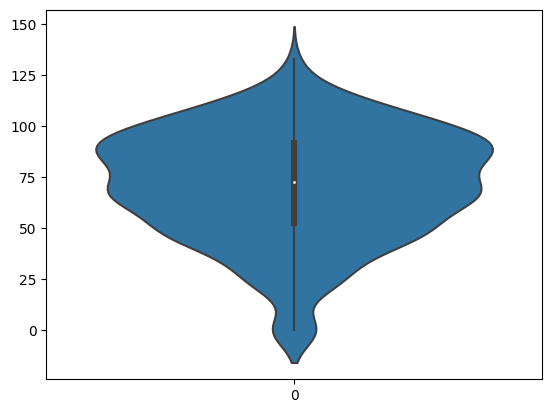

In [444]:
clean_data = numeric_treatment(clean_data, column, "<10", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### OD_PORC_FON

In [445]:
column = "OD_PORC_FON"
clean_data[column].unique()

array([nan, '92.2', '86.7', '95.5', '94.2', '79.2', '146', '101.6',
       '107.9', '104.9', '106.4', '103.2', '99.6', '104.2', '105.6',
       '114.2', '128.2', '118', '88.5', '105', '81.4', '111.9', '106.1',
       '99.5', '80.1', '102.3', '106', '99.2', '83.7', '84.2', '87.2',
       '92.9', '97.8', '131.4', '90.1', '112.2', '109.5', '92.4', '89.4',
       '92.8', '106.7', '98.6', '96.4', '117.3', '106.3', '122.6', '34.3',
       '89.7', '82', '102.9', '102.4', '107', '110.9', '101.4', '102.6',
       '113.2', '110.7', '89.6', '87.8', '82.1', '84', '80.4', '85.5',
       '70.5', '74.3', '36.6', '59.1', '39.8', '81.7', '67.7', '58.9',
       '59', '60.3', '68', '47.5', '69.8', '118.6', '35.1', '109', '83',
       '126.5', '85.7', '98.2', '98.4', '66.9', '78.4', '90.4', '93.1',
       '91.4', '95.1', '72.1', '35.5', '111.8', '102.8', '107.8', '101.3',
       '90.7', '91', '108.2', '85.6', '36', '60.7', '35.7', '26.4',
       '31.8', '31.7', '36.3', '73.8', '107.2', '19.2', '82.2', '86

Percentage of unique value to total: 0.03699788583509514
Values distribution: count    946.000000
mean      66.499260
std       28.996016
min        0.000000
25%       47.325000
50%       67.500000
75%       88.875000
max      146.000000
Name: OD_PORC_FON, dtype: float64


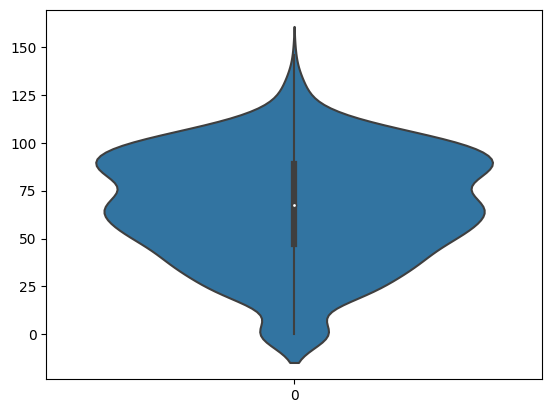

In [446]:
clean_data = numeric_treatment(clean_data, column, "<10", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### TOX_D_48_UT

In [447]:
column = "TOX_D_48_UT"
clean_data[column].unique()

array([nan, '<1', '2.295', '2.699', '2.937', '1.696', '1.182', '1.184',
       '2.305', '3.546', '1.205', '1.881', '1.84', '1.387', '2.869',
       '2.759', '2.902', '2.584', '1.741', '1.658', '3.062', '1.639',
       '2.466', '2.783', '2.644', '1.919', '2.85', '1.272', '2.959',
       '2.317', '4.6', '1.318', '1.761', '2.625', '2.237', '1.34',
       '1.085', '1.04', '2.475', '1.645', '1.12', '1.35', '1.25', '4.474',
       '1.083', '1.08', '5.218', '1.533', '2.622', '2.332', '1.488',
       '2.717', '1.338', '1.148', '1.68', '1.337', '1.065', '1.374',
       '1.971', '1.191', '1.1', '2.73', '1.202', '10.627', '1.158',
       '1.095', '1.254', '1.047', '1.072', '1.211', '1.069', '1.55',
       '1.235', '1.174', '1.153', '6.63', '1.249', '1.003', '2.586',
       '1.644', '23.949', '1.036', '3.111', '1.586', '1.268', '1.392'],
      dtype=object)

Percentage of unique value to total: 0.9520925110132159
Values distribution: count    1816.000000
mean        0.109529
std         0.767205
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.949000
Name: TOX_D_48_UT, dtype: float64


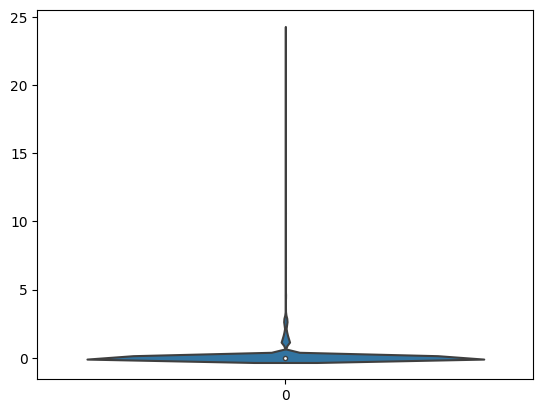

In [448]:
clean_data = numeric_treatment(clean_data, column, "<1", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### TOX_V_15_UT

In [449]:
column = "TOX_V_15_UT"
clean_data[column].unique()

array([nan, '<1', '1.651', '6.781', '1.602', '5.704', '1.859', '1.838',
       '4.701', '4.556', '5.339', '3.183', '4.223', '15.533', '8.271',
       '7.158', '6.649', '4.395', '8.866', '8.489', '2.146', '3.593',
       '3.095', '3.807', '3.225', '6.025', '2.612', '3.25', '20.317',
       '4.456', '59.844', '66.934', '156.25', '1.637', '2.36', '1.022',
       '3.817', '8.325', '3.626', '1.357', '28.209', '3.341', '21.968',
       '3.411', '4.973', '2.808', '1.764', '8.823', '3.004', '1.239',
       '6.729', '11.896', '11.85', '17.59', '12.56', '4.19', '5.8',
       '14.46', '9.12', '4.95', '24.65', '24.82', '1.73', '17.746',
       '11.75', '11.46', '14.11', '8.96', '22.04', '8.183', '8.46',
       '5.06', '6.964', '1.126', '13.708', '4.257', '3.654', '7.74',
       '1.804', '5.593', '7.283', '3.068', '3.667', '4.677', '4.733',
       '3.255', '3.126', '4.9', '7.7', '12.39', '1.566', '2.232', '1.93',
       '5.757', '11.07', '2.63', '2.52', '1.54', '6.84', '6.72', '38.8',
       '2.246

Percentage of unique value to total: 0.9186366135239142
Values distribution: count    1819.000000
mean        0.877028
std         6.447175
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       156.250000
Name: TOX_V_15_UT, dtype: float64


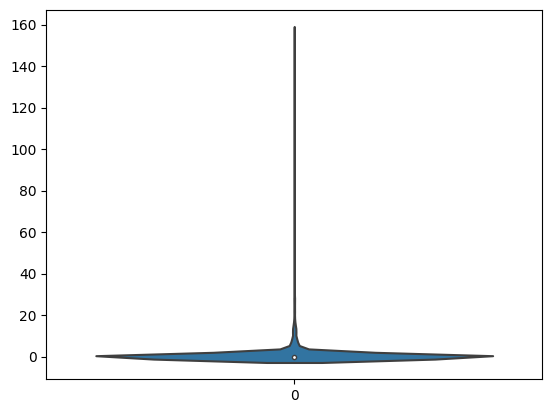

In [450]:
clean_data = numeric_treatment(clean_data, column, "<1", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### TOX_D_48_SUP_UT

In [451]:
column = "TOX_D_48_SUP_UT"
clean_data[column].unique()

array(['<1', nan, '1.86', '2.97', '1.67', '1.13', '1.3', '1.04', '1.01',
       '1.64', '1.71', '1.11', '1.29', '1.12', '1.23', '1.14', '1.15',
       '21.32', '13.39', '2.39', '1.08', '1.05', '1.16', '1.58'],
      dtype=object)

Percentage of unique value to total: 0.968503937007874
Values distribution: count    762.000000
mean       0.086142
std        0.942977
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       21.320000
Name: TOX_D_48_SUP_UT, dtype: float64


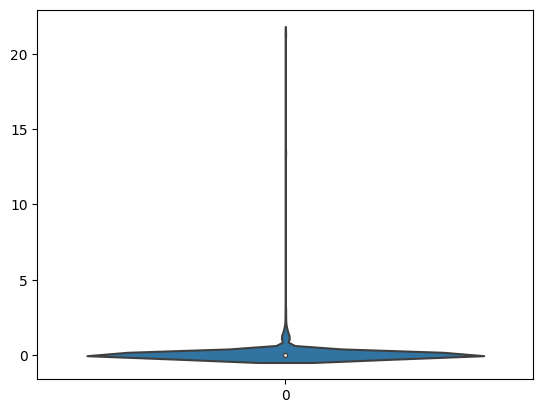

In [452]:
clean_data = numeric_treatment(clean_data, column, "<1", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

### TOX_D_48_FON_UT

In [453]:
column = "TOX_D_48_FON_UT"
clean_data[column].unique()


array([nan])

La columna está totalmente vacía, por lo que se procede a eliminar del conjunto de datos.

In [454]:
clean_data = clean_data.drop(columns=[column])

### TOX_FIS_SUP_15_UT

In [455]:
column = "TOX_FIS_SUP_15_UT"
clean_data[column].unique()

array(['<1', nan, '2.87', '2.13', '1.09', '7.87', '2.89', '3.04', '5.67',
       '4.23', '7.86', '1.4', '1.46', '2.21', '2.81', '2.36', '5.57',
       '2.32'], dtype=object)

Percentage of unique value to total: 0.9898446833930705
Values distribution: count    1674.000000
mean        0.035048
std         0.402071
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.870000
Name: TOX_FIS_SUP_15_UT, dtype: float64


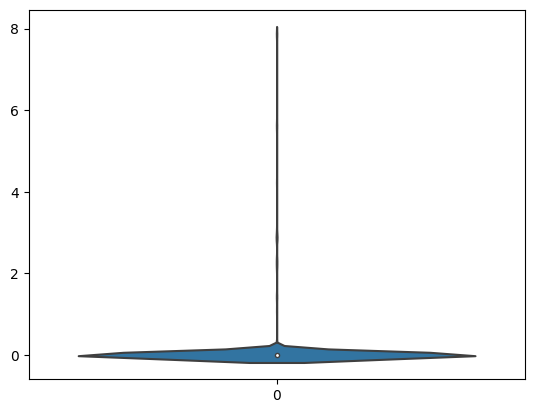

In [456]:
clean_data = numeric_treatment(clean_data, column, "<1", 0)
data_types[column] = "float64" # Data types to be converted when cleaned

In [457]:
clean_data.columns[clean_data.isna().sum() > 0]

Index(['TOX_FIS_FON_15_UT'], dtype='object')

### TOX_FIS_FON_15_UT

In [458]:
column = "TOX_FIS_FON_15_UT"
clean_data[column].unique()

array([nan])

La columna está vacía, por lo que se procede a eliminarla del conjunto de datos.

In [459]:
clean_data = clean_data.drop(columns=[column])

In [460]:
clean_data.size

178143

Una vez limpia la base de datos, podemos convertir a los tipos dee datos que corresponden a cada columna.

In [463]:
clean_data = clean_data.astype(data_types)
clean_data.dtypes

CLAVE                      object
SITIO                      object
ORGANISMO_DE_CUENCA        object
ESTADO                     object
MUNICIPIO                  object
CUENCA                     object
CUERPO DE AGUA             object
TIPO                       object
SUBTIPO                    object
LONGITUD                  float64
LATITUD                   float64
PERIODO                   float64
DBO_mg/L                  float64
CALIDAD_DBO                object
DQO_mg/L                  float64
CALIDAD_DQO                object
SST_mg/L                  float64
CALIDAD_SST                object
COLI_FEC_NMP_100mL        float64
CALIDAD_COLI_FEC           object
E_COLI_NMP_100mL          float64
CALIDAD_E_COLI             object
ENTEROC_NMP_100mL         float64
CALIDAD_ENTEROC            object
OD_PORC                   float64
CALIDAD_OD_PORC            object
OD_PORC_SUP               float64
CALIDAD_OD_PORC_SUP        object
OD_PORC_MED               float64
CALIDAD_OD_POR

### Codificación de los datos categóricos

In [464]:
data = clean_data # Save cleaned data as available data

In [465]:
# Creación de objeto de LabelEncoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['SEMAFORO'])
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_name_mapping)

# Encode labels in column 'species'.
data['SEMAFORO']= label_encoder.fit_transform(data['SEMAFORO'])
data['SEMAFORO'].unique

{'Amarillo': 0, 'Rojo': 1, 'Verde': 2}


<bound method Series.unique of 0       1
1       2
2       2
3       2
4       2
       ..
3488    0
3489    1
3490    1
3491    0
3492    0
Name: SEMAFORO, Length: 3493, dtype: int64>

## Exploración de los Datos

### Medidas de Tendencias Central
 * Promedio (mean)
 * Mediana (50%)
### Medidas de Dispersión
 * Desviación Estándard (std)
 * Máximo (max)
 * Mínimo (min)
### Medidas de Posición No Centrales
 * Cuartiles (25%, 50%, 75%)
 * Outliers (Boxplot)

In [466]:
data.describe()

,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT,SEMAFORO
count,3493.000000,3493.000000,3493.0,3493.000000,3493.000000,3493.000000,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.00000
mean,-100.359969,21.046992,2020.0,12.463374,52.987848,99.539672,7.135831e+04,5.875611e+04,280.845605,67.234125,82.833410,72.247123,67.228972,0.056944,0.456717,0.018792,0.016796,1.03779
std,6.122773,3.893696,0.0,56.487492,130.424856,442.161444,1.005750e+06,9.045168e+05,2240.832128,23.398534,19.657592,10.111986,15.090577,0.555813,4.672482,0.441642,0.278850,0.82851
min,-117.124030,14.534910,2020.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-103.882310,18.396070,2020.0,0.000000,16.740000,0.000000,8.550000e+02,9.000000e+01,0.000000,67.400000,84.100000,72.400000,67.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-99.795530,20.148980,2020.0,2.630000,27.010000,24.300000,2.400000e+03,4.240000e+02,0.000000,68.300000,84.100000,72.400000,67.500000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,-96.860230,22.828930,2020.0,6.760000,42.620000,57.000000,1.100000e+04,2.400000e+03,0.000000,69.400000,84.100000,72.400000,67.500000,0.000000,0.000000,0.000000,0.000000,2.00000
max,-86.732150,32.706500,2020.0,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000,2.00000


### Boxplot

In [508]:
numerical_data = data.select_dtypes(include=["float"])
X = numerical_data.columns # Select only numerical values
X.shape

(17,)

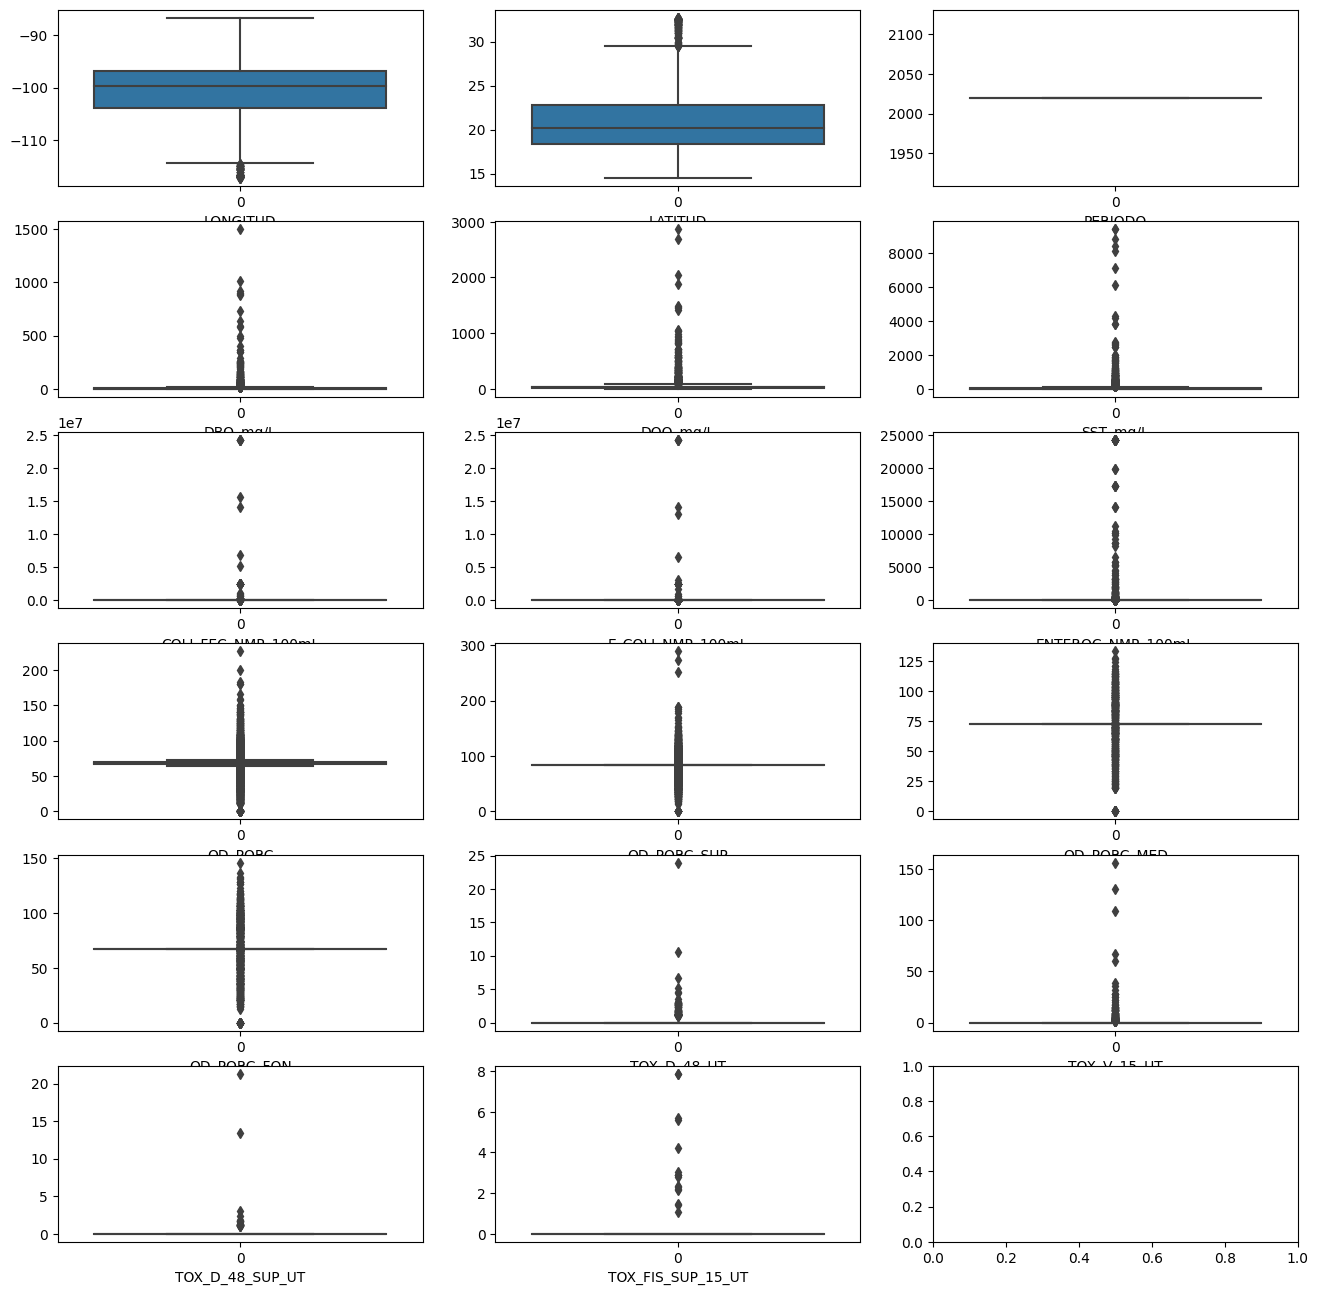

In [509]:
fig, axes = plt.subplots(6, 3, figsize=(16, 16))

for name, ax in zip(X, axes.flatten()):
    sns.boxplot(data=data[name], orient='v', ax=ax).set(xlabel=name)


## Matriz de correlación

<AxesSubplot: >

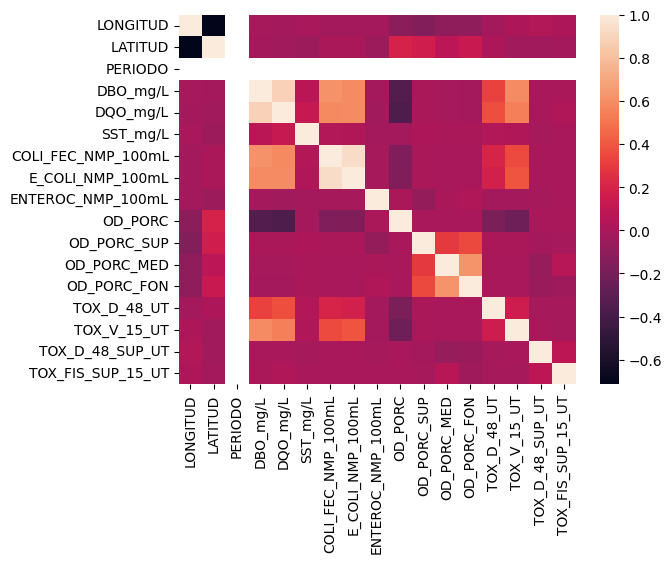

In [511]:
corr_mat = numerical_data.corr()
sns.heatmap(corr_mat)

## Análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K-means 

### Método de Curva de Codo ('Elbow Curve Method')

In [77]:
columns = ['LONGITUD', 'LATITUD']
X = data[columns]
y = data['SEMAFORO']

# dataframe for kmeans
columns_kmeans = ['LONGITUD', 'LATITUD', 'SEMAFORO']
kmeans_df = data[columns_kmeans]
kmeans_df['SEMAFORO'] = kmeans_df['SEMAFORO'].replace([0,1,2],['Amarillo', 'Rojo', 'Verde'])


In [78]:
distortions = []
for i in range(1, 8):
    k_means = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=2000,
        tol=1e-04, random_state=0
    )
    k_means.fit(X)
    distortions.append(k_means.inertia_)

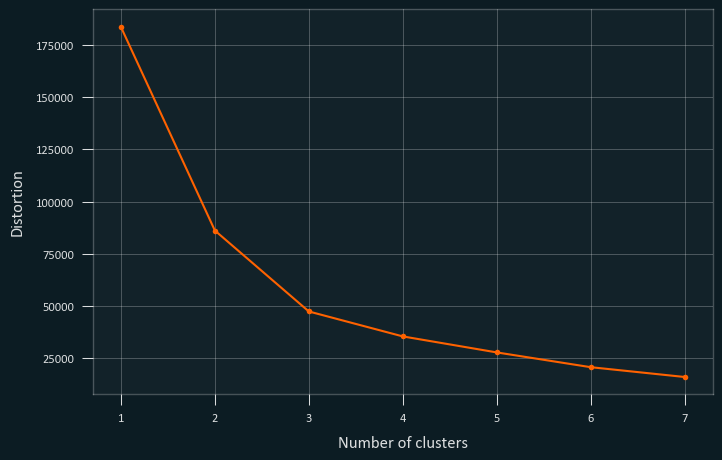

In [79]:
# Gráfica
plt.figure(figsize=(8,5))
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Como podemos observar en la gráfic, empleando el método del codo el punto de inflexión se genera aproximadamente cuando k=3

###  Agrupamiento de latitudes y longitudes con K means

In [80]:
# Creación de los clústers
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
y_pred = kmeans.predict(X)
y_pred

array([2, 1, 1, ..., 2, 2, 2])

In [81]:
kmeans_df['Cluster'] = y_pred
kmeans_df.head()

,LONGITUD,LATITUD,SEMAFORO,Cluster
0,-102.33911,22.24730,Rojo,2
1,-109.84290,22.90473,Verde,1
2,-109.86442,22.89880,Verde,1
3,-109.88604,22.89609,Verde,1
4,-109.89657,22.87694,Verde,1


### Resultados de agrupamiento de latitudes y longitudes

In [82]:
# Obtención de los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ -93.47131781   17.89790126]
 [-110.64834892   27.69513598]
 [-101.05200614   20.84569401]]


## Resultados de agrupamiento de latitudes y longitudes con K-means en el mapa de México.

### Funciones para la visualización de los Resultados

In [83]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [84]:
def plot_centroids_enum(centroids):
    i = 0
    for centroid in centroids:
        plt.text(centroid[0]+.5, centroid[1]+.5, f"{i}", horizontalalignment='center', size='large', color='black', weight='semibold',
                 ha="center", va="center",
                 bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8)))
        i+=1

In [85]:
def plot_clusters(X, y_pred, k):
    if k == 3:
        assign_classes=['Agrupación 1', 'Agrupación 2', 'Agrupación 3']
        colors = ListedColormap(['r','b','g'])
    else:
        a = []
        assign_classes = [a.append(f'Agrupación {i}') for i in range(5)]
        colors = 'Accent'
    scatter = plt.scatter(
        data.loc[:, ['LONGITUD']], data.loc[:, ['LATITUD']],
        c=y_pred, cmap=colors, s=50)
    
    if k == 3:
        plt.legend(handles=scatter.legend_elements()[0], labels=assign_classes, markerscale=3, fontsize=20)
    plt.title('Agrupamiento de Sitios de Monitoreo del Agua', fontsize=25)
    plt.xlabel("Latitud")
    plt.ylabel("Longitud")

In [86]:
def plot_map_clusters(X, y_pred, k, centroids):
    fig, gax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='gray')
    plot_clusters(X, y_pred, k)
    plot_centroids(centroids)
    plt.gca().set_axisbelow(True)
    plt.show()

In [87]:
def plot_traffic_light(X, y):
    # {'Amarillo': 0, 'Rojo': 1, 'Verde': 2}
    colors = ListedColormap(['yellow','r','g'])
    scatter = plt.scatter(
    data.loc[:, ['LONGITUD']], data.loc[:, ['LATITUD']],
    c=y, cmap=colors, s=50)

In [88]:
def plot_map_boundaries(clusterer, X, y, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, gax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Blues")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=0.5, colors='k')
    world.query("name == 'Mexico'").plot(ax = gax, color='gray', alpha=0.35)
    plot_centroids_enum(clusterer.cluster_centers_)
    plot_traffic_light(X, y)
    plt.title('Semáforo de Sitios de Monitoreo del Agua por Zonas Geográficas', fontsize=25)
    plt.xlabel("Latitud")
    plt.ylabel("Longitud")
    plt.gca().set_axisbelow(True)
    plt.show()

### Visualización de Mapa de México

In [89]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

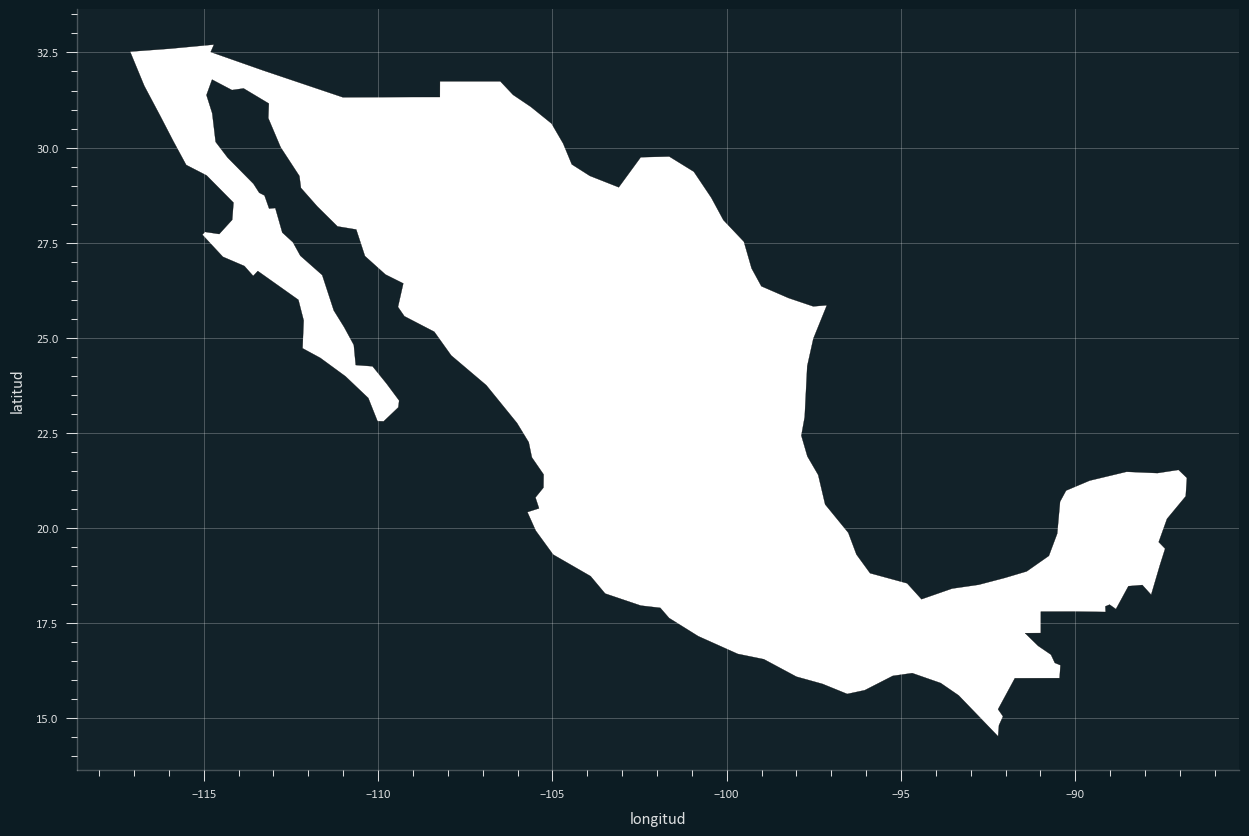

In [90]:
fig, gax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

### Visualización de Agrupamientos por K-means

#### Agrupamiento de latitudes y longitudes con K means en el mapa de México

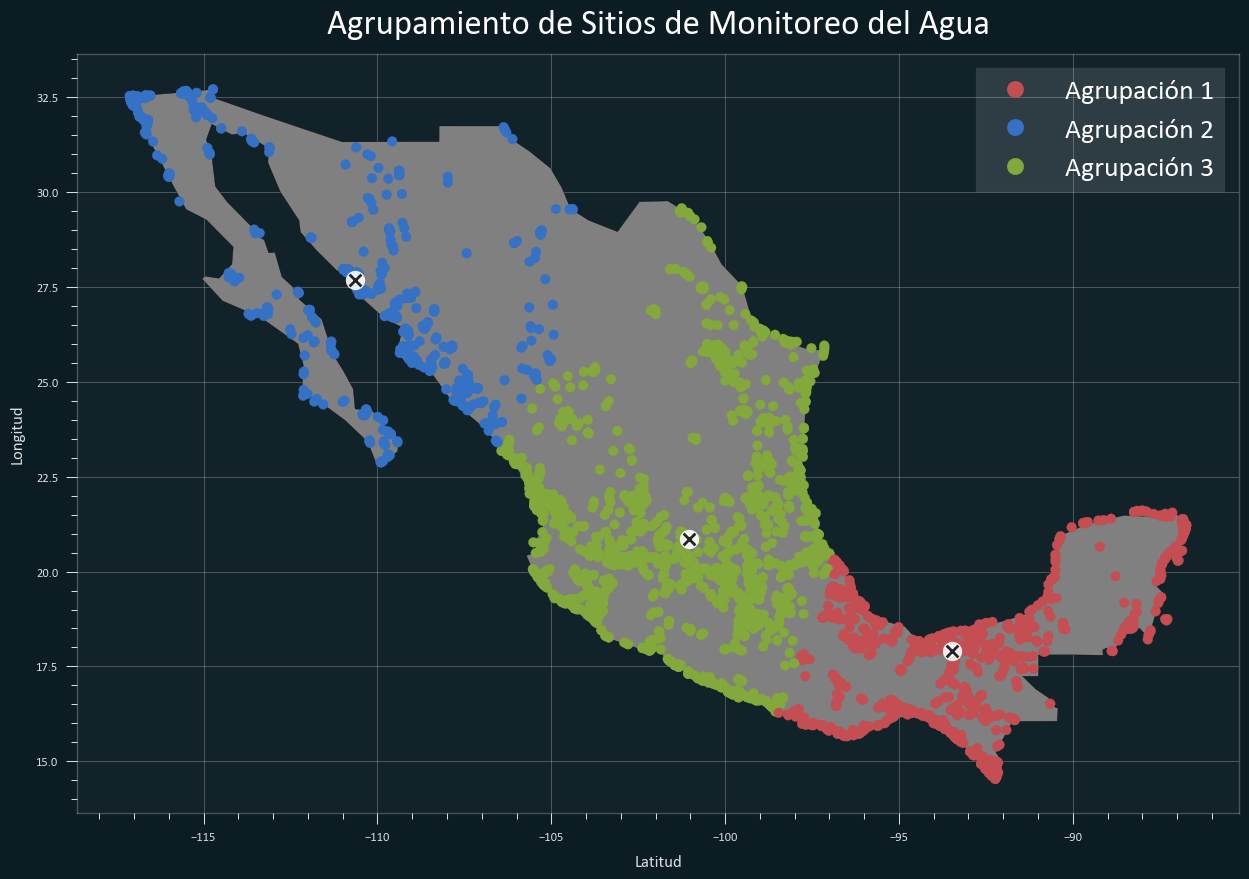

In [91]:
plot_map_clusters(X, y_pred, k, centroids)

Empleando el valor que nos dio el método del codo de k=3 podemos ver que la división quedaría aproximadamente por regiones geográficas Norte, Centro, Sur

#### Relación entre la calidad del agua y su ubicación geográfica a través de K- means

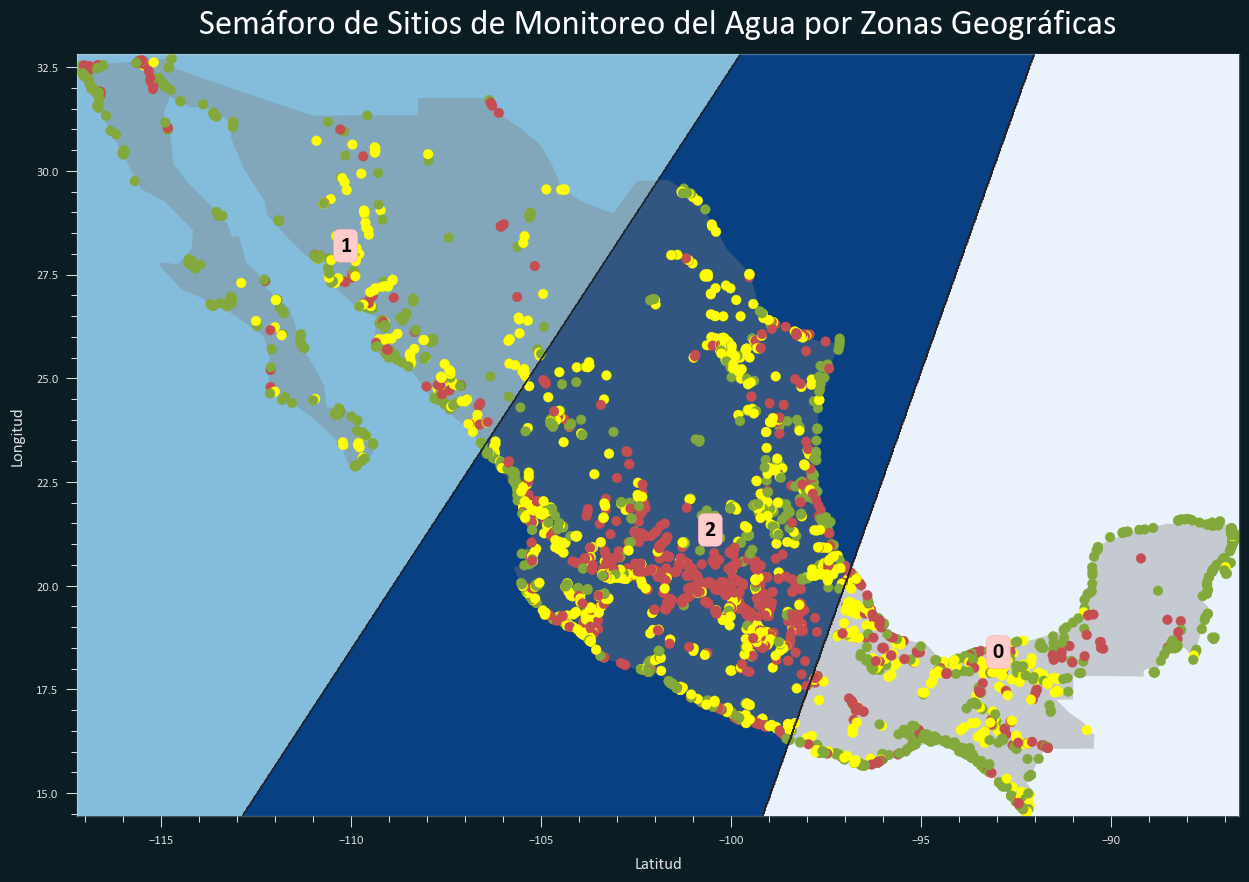

In [92]:
plot_map_boundaries(kmeans, X, y)

Podemos observar que el tener estas agrupaciones (clústers) nos ayuda a tener una mejor comprensión visual de cómo se distribuyen los semáforos por zona geográfica y cuáles podrían predominar en cada zona.

Contabilización de los semáforos por región (clúster: 0 = sur, 1 = norte, 2 = centro)

In [93]:
table = kmeans_df.groupby(['Cluster','SEMAFORO']).size().unstack()
table

SEMAFORO,Amarillo,Rojo,Verde
Cluster,,,
0,300,202,484
1,146,93,288
2,689,796,495


Vamos a procedec a hacer una segunda iteración para ver como cambia la visualización de los semáforos al tener más clústers

## Segunda Iteración aumentando el valor de K

####  Agrupamiento de latitudes y longitudes con K means

In [94]:
# Creación de los clústers
k = 11
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
y_pred = kmeans.predict(X)
y_pred

array([ 1,  9,  9, ..., 10, 10, 10])

In [95]:
kmeans_df['Cluster'] = y_pred
kmeans_df.head()

,LONGITUD,LATITUD,SEMAFORO,Cluster
0,-102.33911,22.24730,Rojo,1
1,-109.84290,22.90473,Verde,9
2,-109.86442,22.89880,Verde,9
3,-109.88604,22.89609,Verde,9
4,-109.89657,22.87694,Verde,9


#### Resultados de agrupamiento de latitudes y longitudes

In [96]:
# Obtención de los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ -98.46585058   22.31270277]
 [-104.03198299   20.5815282 ]
 [ -93.3567396    17.00776996]
 [-115.9685       32.04154587]
 [ -98.9325036    17.27167597]
 [-110.32301463   27.16573165]
 [ -88.12757743   20.19476814]
 [ -97.18249064   19.19588754]
 [-100.84510617   19.73664197]
 [-106.441198     24.652672  ]
 [ -99.72717873   26.12937338]]


#### Visualización de Agrupamientos por K-means

##### Visualización del agrupamiento de latitudes y longitudes con K means en el mapa de México

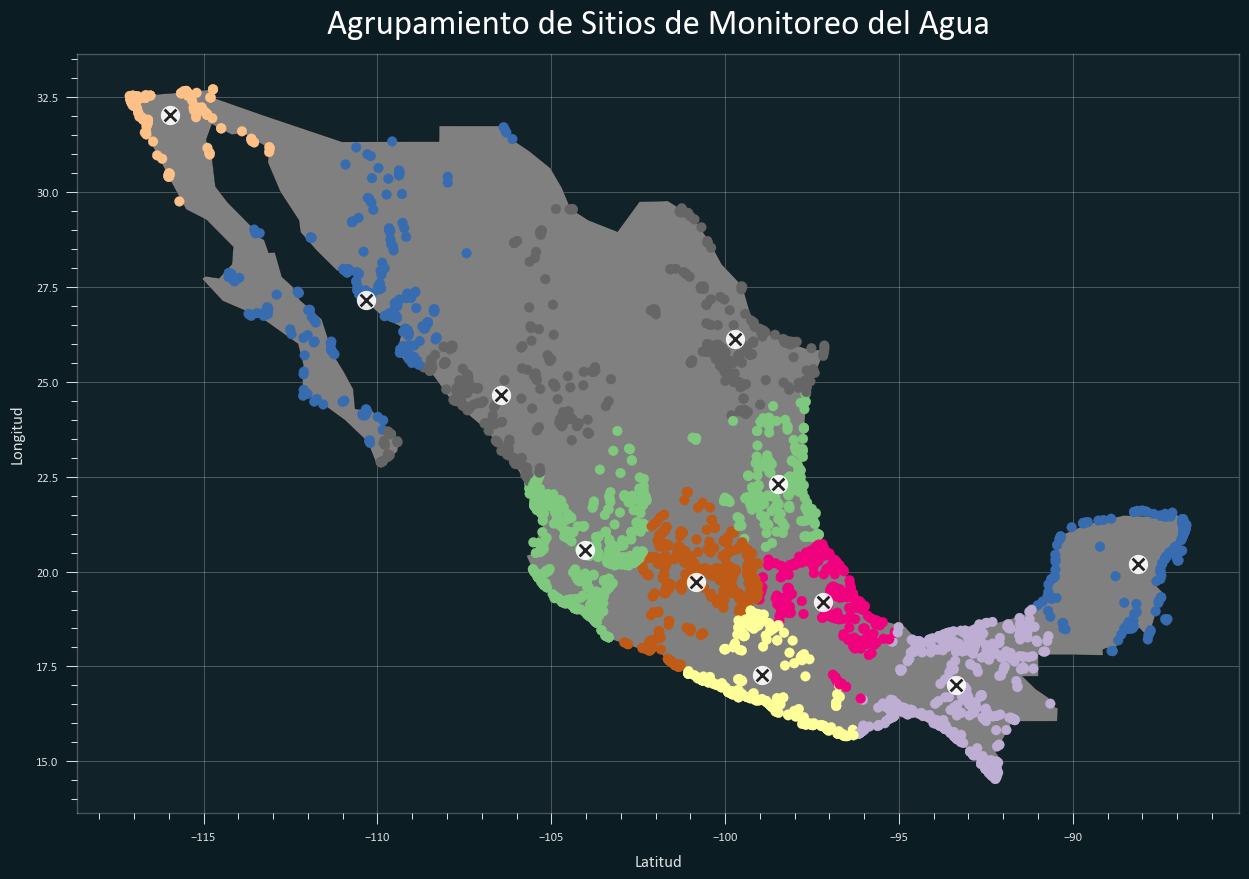

In [97]:
plot_map_clusters(X, y_pred, k, centroids)

##### Relación entre la calidad del agua y su ubicación geográfica a través de K- means

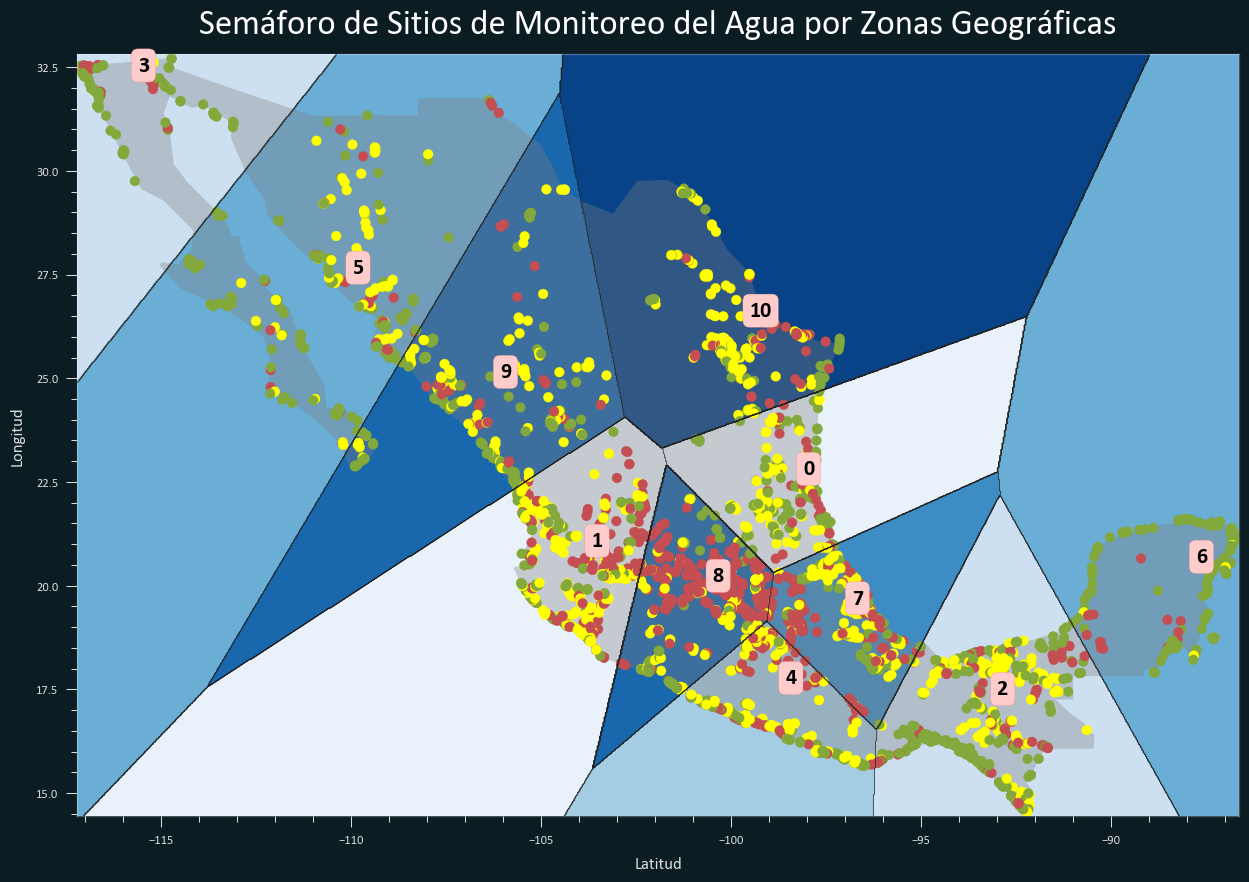

In [98]:
plot_map_boundaries(kmeans, X, y)

Contabilización de los semáforos por región

In [99]:
table = kmeans_df.groupby(['Cluster','SEMAFORO']).size().unstack()
table

SEMAFORO,Amarillo,Rojo,Verde
Cluster,,,
0,84,46,112
1,210,158,132
2,170,90,263
3,4,41,76
4,133,96,96
5,68,31,143
6,4,15,148
7,142,193,56
8,89,344,79
